1.  Загрузите датасет в pandas DataFrame под названием df.
    
2.  Выполните предварительную обработку данных, выполнив следующие шаги: <br>
    a. Определите и обработайте отсутствующие значения в датасете. Определите, в каких столбцах есть отсутствующие значения, и решите, как их обработать (например, заполнить средним, медианой или модой, или отбросить столбцы/строки с существенными отсутствующими значениями). <br>
    b. Проверьте и обработайте любые дублирующиеся строки в датасете. <br>
    c. Проанализируйте типы данных в каждом столбце и при необходимости преобразуйте их (например, из объектных в числовые типы).
    
3.  Проведите разведочный анализ данных (EDA), ответив на следующие вопросы: <br>
    a. Каково распределение целевой переменной 'SalePrice'? Есть ли какие-либо выбросы? <br>
    b. Исследуйте взаимосвязи между целевой переменной и другими характеристиками. Есть ли сильные корреляции? <br>
    c. Исследуйте распределение и взаимосвязи других важных характеристик, таких как 'OverallQual', 'GrLivArea', 'GarageCars' и т.д. <br>
    d. Визуализируйте данные, используя соответствующие графики (например, гистограммы, диаграммы рассеяния, квадратные диаграммы), чтобы получить представление о датасете.
    
4.  Выполните проектирование признаков путем реализации следующих преобразований: <br>
    a. Работайте с категориальными переменными, применяя one-hot encoding или label encoding, в зависимости от характера переменной. <br>
    b. При необходимости создайте новые характеристики, такие как общая площадь или возраст объекта недвижимости, путем объединения существующих характеристик.
    
5.  Сохраните очищенный и преобразованный набор данных в новый CSV-файл под названием 'cleaned_house_prices.csv'.


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
nn = df.isnull().sum()
nn1 = nn.drop(nn[nn==0].index)
nn1

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [6]:
dup = df.duplicated()
dup = dup.loc[dup==True]
dup

Series([], dtype: bool)

Нет повторяющихся строк

In [7]:
df = df.drop(columns=['Alley', 'MasVnrType', 'LotFrontage', 'FireplaceQu', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'])
# Эти данные явно не нужны для анализа
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [8]:
GarageYrBlt_median = df['GarageYrBlt'].median()
# Заполнение недостающих значений медианным
print(GarageYrBlt_median)
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(GarageYrBlt_median)

1980.0


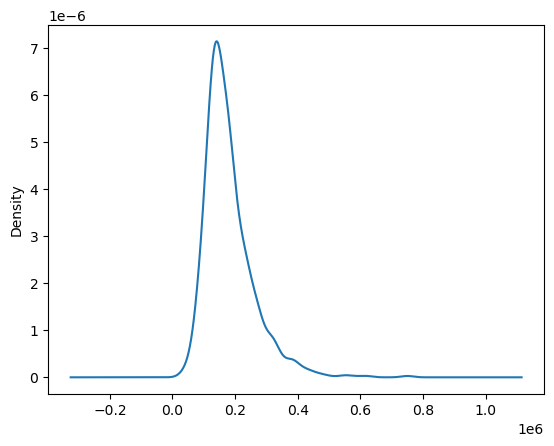

In [9]:
ax = df['SalePrice'].plot.kde()

In [10]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

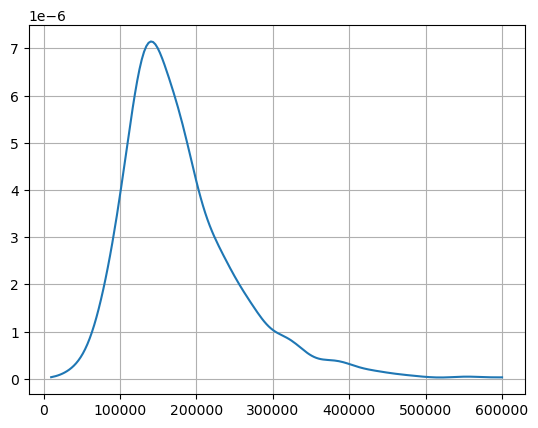

In [11]:
density = stats.gaussian_kde(df['SalePrice'])
x = np.linspace(1e4,6e5,200)
y = density(x)
plt.plot(x, y)
plt.grid()
plt.show()

Плотность вероятности SalePrice по виду лучше всего описывается распрелением хи-квадрат со степенями свободы более 8. Наибольшее кол-во домов продается по цене около $140000. Выбросов не наблюдается.

<Axes: xlabel='OverallCond', ylabel='SalePrice'>

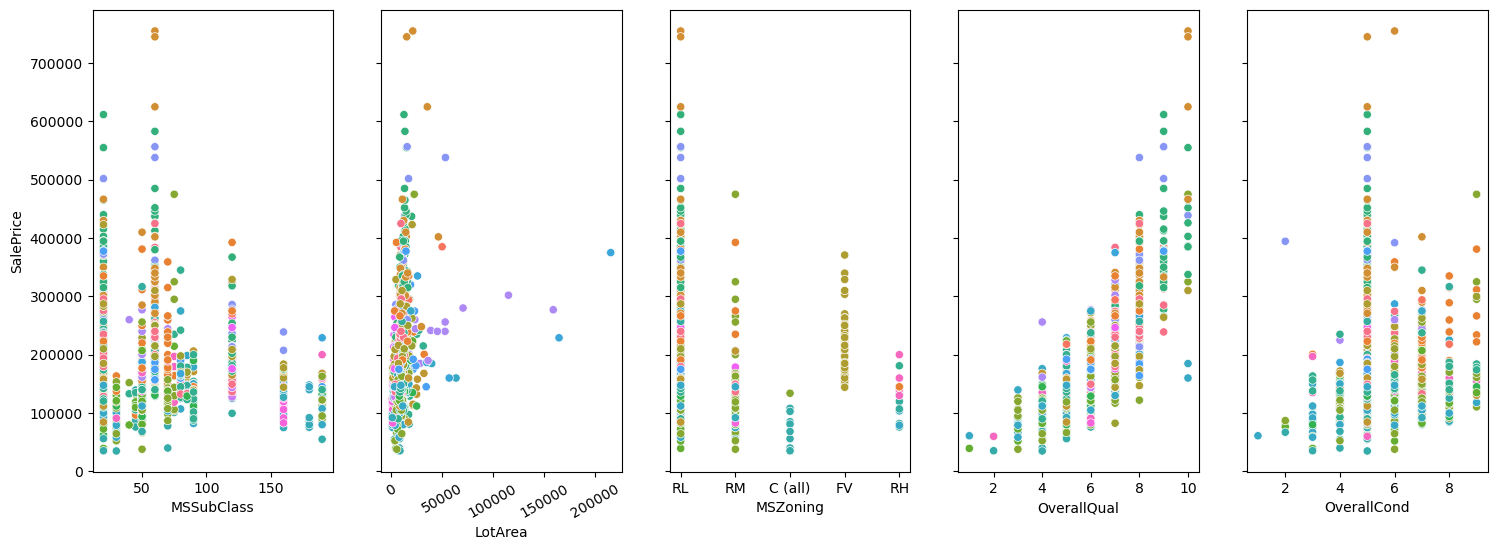

In [12]:
import seaborn as sns
fig, axs = plt.subplots(ncols=5, sharey=True, figsize=(18, 6))
sns.scatterplot(data=df, x="MSSubClass", y="SalePrice", hue='Neighborhood', legend=False, ax=axs[0])
axs[1].tick_params("x",labelrotation=30)
sns.scatterplot(data=df, x="LotArea", y="SalePrice", hue='Neighborhood', legend=False, ax=axs[1])
sns.scatterplot(data=df, x="MSZoning", y="SalePrice", hue='Neighborhood', legend=False, ax=axs[2])
sns.scatterplot(data=df, x="OverallQual", y="SalePrice", hue='Neighborhood', legend=False, ax=axs[3])
sns.scatterplot(data=df, x="OverallCond", y="SalePrice", hue='Neighborhood', legend=False, ax=axs[4])

<Axes: xlabel='BsmtFinSF2', ylabel='SalePrice'>

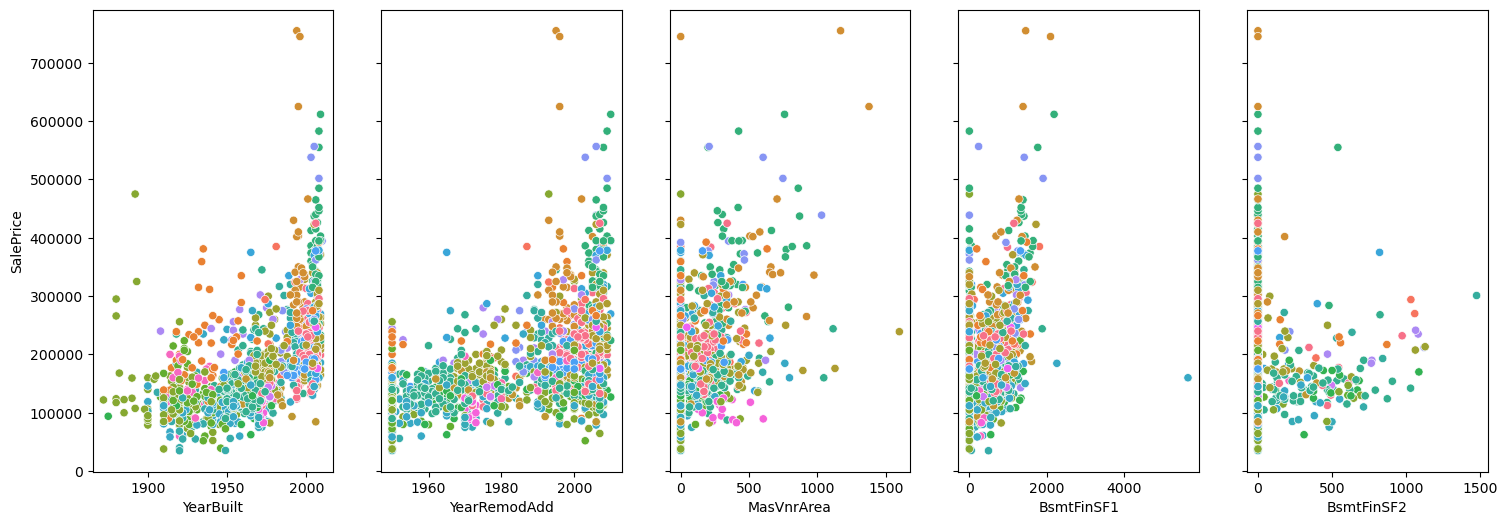

In [13]:
fig, axs = plt.subplots(ncols=5, sharey=True, figsize=(18, 6))
sns.scatterplot(data=df, x="YearBuilt", y="SalePrice", hue='Neighborhood', legend=False, ax=axs[0])
sns.scatterplot(data=df, x="YearRemodAdd", y="SalePrice", hue='Neighborhood', legend=False, ax=axs[1])
sns.scatterplot(data=df, x="MasVnrArea", y="SalePrice", hue='Neighborhood', legend=False, ax=axs[2])
sns.scatterplot(data=df, x="BsmtFinSF1", y="SalePrice", hue='Neighborhood', legend=False, ax=axs[3])
sns.scatterplot(data=df, x="BsmtFinSF2", y="SalePrice", hue='Neighborhood', legend=False, ax=axs[4])

<Axes: xlabel='LowQualFinSF', ylabel='SalePrice'>

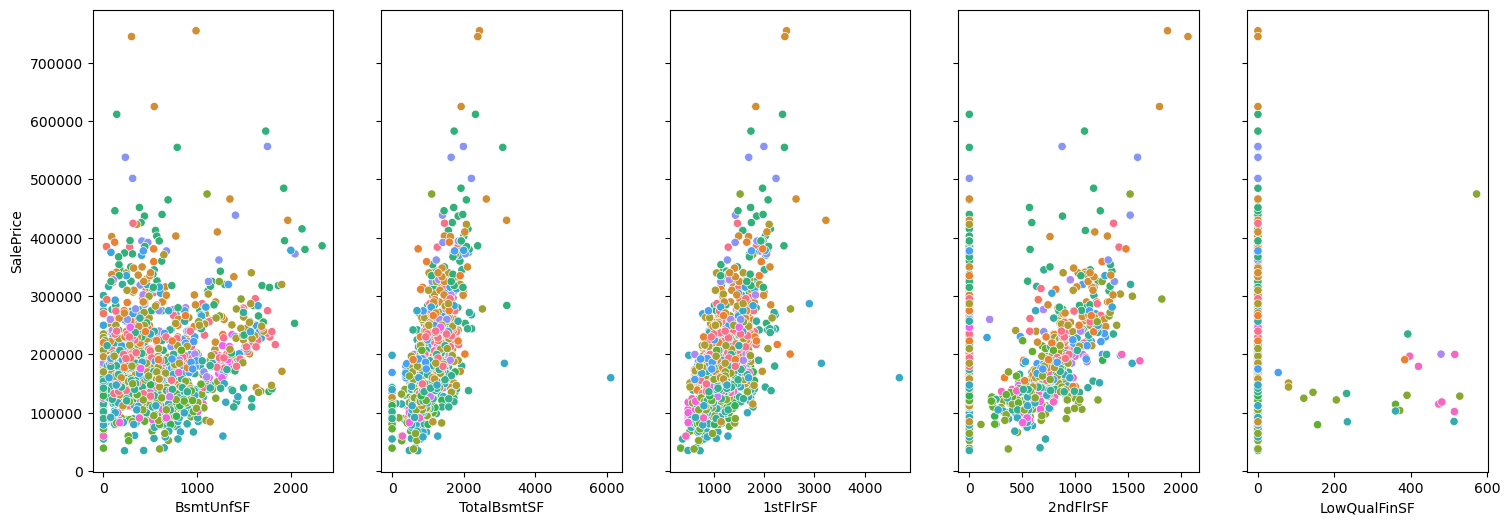

In [14]:
fig, axs = plt.subplots(ncols=5, sharey=True, figsize=(18, 6))
sns.scatterplot(data=df, x="BsmtUnfSF", y="SalePrice", hue='Neighborhood', legend=False, ax=axs[0])
sns.scatterplot(data=df, x="TotalBsmtSF", y="SalePrice", hue='Neighborhood', legend=False, ax=axs[1])
sns.scatterplot(data=df, x="1stFlrSF", y="SalePrice", hue='Neighborhood', legend=False, ax=axs[2])
sns.scatterplot(data=df, x="2ndFlrSF", y="SalePrice", hue='Neighborhood', legend=False, ax=axs[3])
sns.scatterplot(data=df, x="LowQualFinSF", y="SalePrice", hue='Neighborhood', legend=False, ax=axs[4])

<Axes: xlabel='HalfBath', ylabel='SalePrice'>

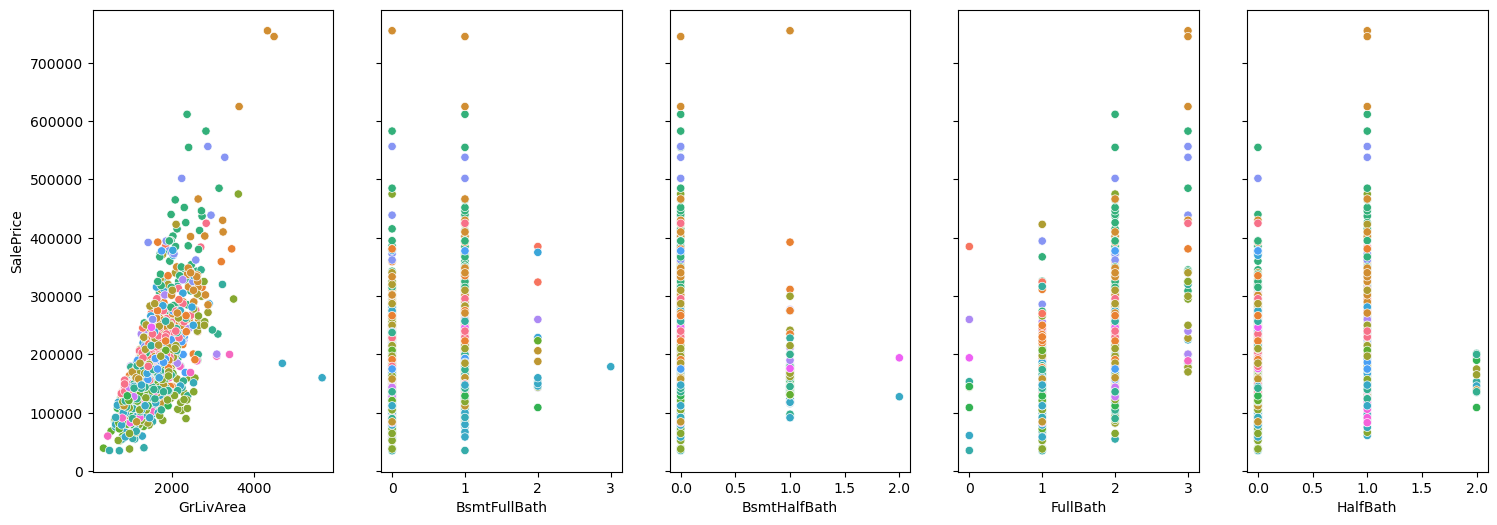

In [15]:
fig, axs = plt.subplots(ncols=5, sharey=True, figsize=(18, 6))
sns.scatterplot(data=df, x="GrLivArea", y="SalePrice", hue='Neighborhood', legend=False, ax=axs[0])
sns.scatterplot(data=df, x="BsmtFullBath", y="SalePrice", hue='Neighborhood', legend=False, ax=axs[1])
sns.scatterplot(data=df, x="BsmtHalfBath", y="SalePrice", hue='Neighborhood', legend=False, ax=axs[2])
sns.scatterplot(data=df, x="FullBath", y="SalePrice", hue='Neighborhood', legend=False, ax=axs[3])
sns.scatterplot(data=df, x="HalfBath", y="SalePrice", hue='Neighborhood', legend=False, ax=axs[4])

<Axes: xlabel='GarageYrBlt', ylabel='SalePrice'>

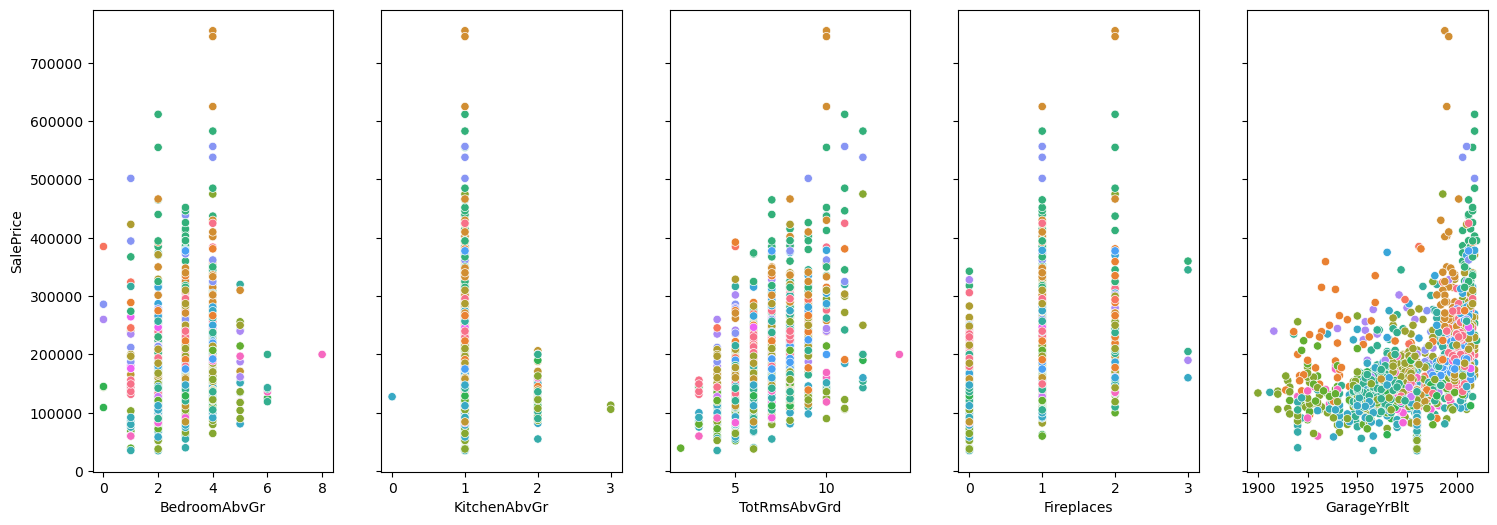

In [16]:
fig, axs = plt.subplots(ncols=5, sharey=True, figsize=(18, 6))
sns.scatterplot(data=df, x="BedroomAbvGr", y="SalePrice", hue='Neighborhood', legend=False, ax=axs[0])
sns.scatterplot(data=df, x="KitchenAbvGr", y="SalePrice", hue='Neighborhood', legend=False, ax=axs[1])
sns.scatterplot(data=df, x="TotRmsAbvGrd", y="SalePrice", hue='Neighborhood', legend=False, ax=axs[2])
sns.scatterplot(data=df, x="Fireplaces", y="SalePrice", hue='Neighborhood', legend=False, ax=axs[3])
sns.scatterplot(data=df, x="GarageYrBlt", y="SalePrice", hue='Neighborhood', legend=False, ax=axs[4])

<Axes: xlabel='EnclosedPorch', ylabel='SalePrice'>

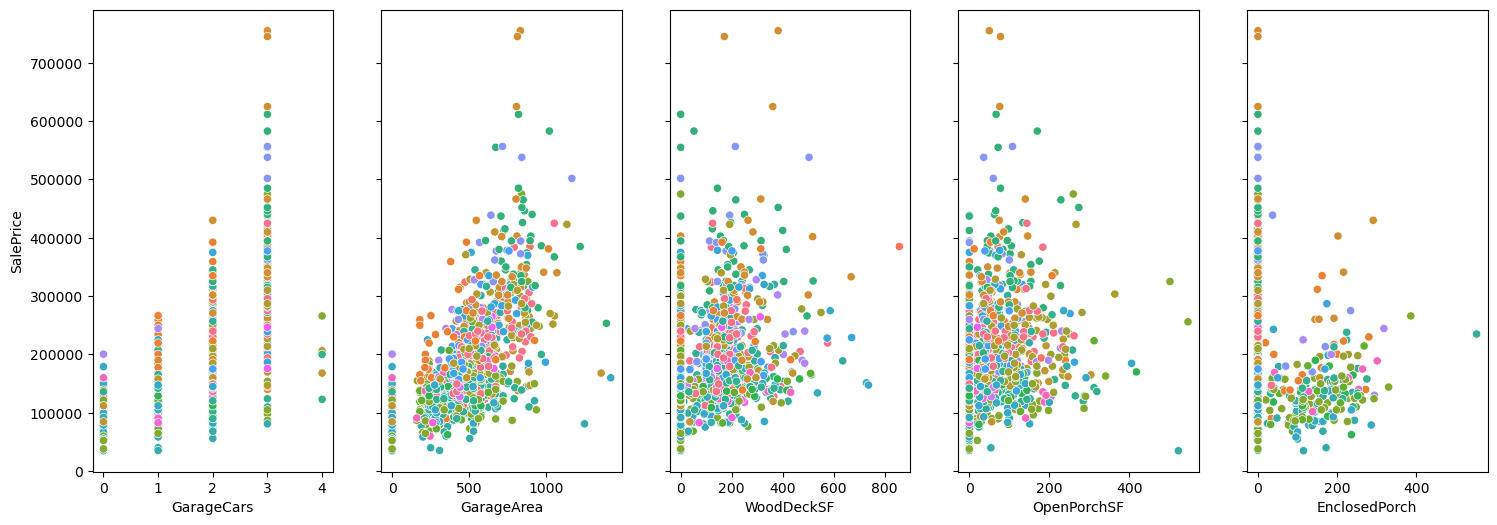

In [17]:
fig, axs = plt.subplots(ncols=5, sharey=True, figsize=(18, 6))
sns.scatterplot(data=df, x="GarageCars", y="SalePrice", hue='Neighborhood', legend=False, ax=axs[0])
sns.scatterplot(data=df, x="GarageArea", y="SalePrice", hue='Neighborhood', legend=False, ax=axs[1])
sns.scatterplot(data=df, x="WoodDeckSF", y="SalePrice", hue='Neighborhood', legend=False, ax=axs[2])
sns.scatterplot(data=df, x="OpenPorchSF", y="SalePrice", hue='Neighborhood', legend=False, ax=axs[3])
sns.scatterplot(data=df, x="EnclosedPorch", y="SalePrice", hue='Neighborhood', legend=False, ax=axs[4])

<Axes: xlabel='YrSold', ylabel='SalePrice'>

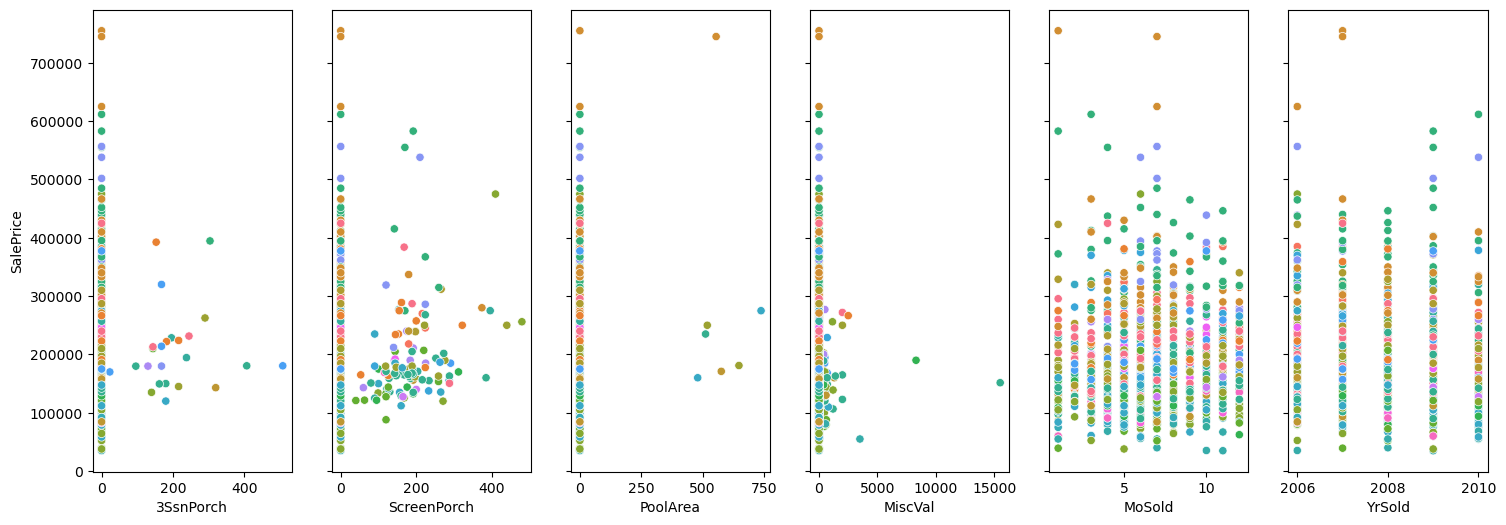

In [18]:
fig, axs = plt.subplots(ncols=6, sharey=True, figsize=(18, 6))
sns.scatterplot(data=df, x="3SsnPorch", y="SalePrice", hue='Neighborhood', legend=False, ax=axs[0])
sns.scatterplot(data=df, x="ScreenPorch", y="SalePrice", hue='Neighborhood', legend=False, ax=axs[1])
sns.scatterplot(data=df, x="PoolArea", y="SalePrice", hue='Neighborhood', legend=False, ax=axs[2])
sns.scatterplot(data=df, x="MiscVal", y="SalePrice", hue='Neighborhood', legend=False, ax=axs[3])
sns.scatterplot(data=df, x="MoSold", y="SalePrice", hue='Neighborhood', legend=False, ax=axs[4])
sns.scatterplot(data=df, x="YrSold", y="SalePrice", hue='Neighborhood', legend=False, ax=axs[5])

Есть сильная корреляция SalePrice с OverallQual, LotArea (если убрать выбросы), YearBuilt, YearRemodAdd, TotalBsmtSF, 1stFlrSF (по сути повторяет TotalBsmtSF), 2ndFlrSF (по сути повторяет TotalBsmtSF), GrLivArea, FullBath, TotRmsAbvGrd, GarageCars, GarageArea.

<Axes: xlabel='MSZoning', ylabel='Count'>

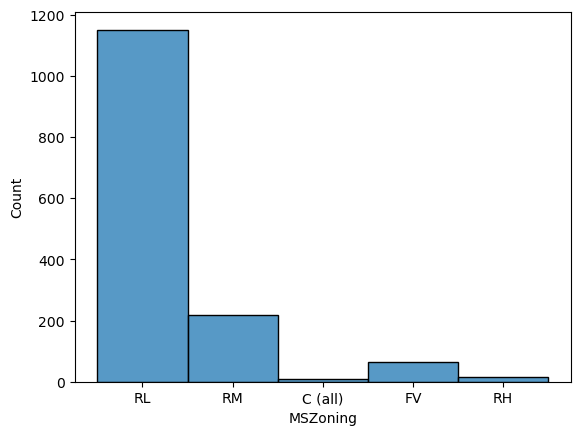

In [19]:
sns.histplot(data=df, x="MSZoning")

Больше всего домов продается в жилых районах малой плотности.

<Axes: xlabel='MSZoning', ylabel='SalePrice'>

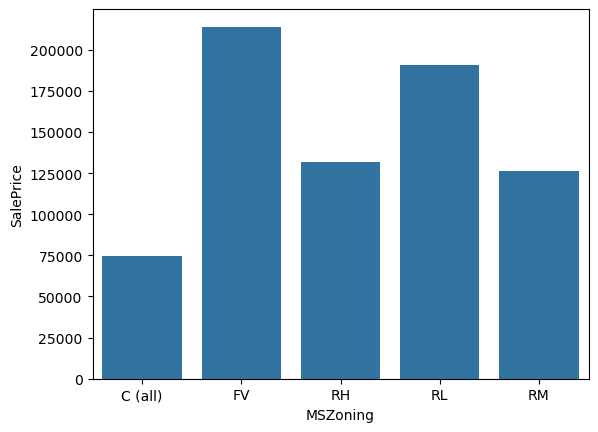

In [20]:
pvt_msz = df.pivot_table(index='MSZoning', values='SalePrice', aggfunc='mean')
sns.barplot(pvt_msz, x="MSZoning", y="SalePrice")

Средняя цена выше в плавучих поселениях и жилых районах малой плотности.

Помимо упомянутых характеристик OverallQual, GrLivArea, GarageCars важными представляются: YearBuilt, YearRemodAdd, Neighborhood, TotalBsmtSF, Lot Area, OverallCond.

Наблюдается, прямая усредненная зависимость цены от качества материалов конструкции и отделки, общего состояния дома (в большей степени), общей жилой площади выше фундамента и размера гаража (кол-во машин). Причем наибольшая зависимость от жилой площади. В зависимости от общего состояния дома есть выброс на уровне среднего состояния. Видимо таких домов больше всего и это состояние охватывает весь диапазон стоимости.

Наблюдается, прямая усредненная зависимость цены от года постройки, года капремонта и общей площади фундамента (в принципе она, похоже, напрямую связана с общей жилой площадью). Причем наибольшая зависимость от площади фундамента.

In [21]:
df1 = df[['OverallQual', 'OverallCond', 'GrLivArea', 'GarageCars', 'Neighborhood', 'SalePrice']]
df2 = df[['YearBuilt', 'YearRemodAdd', 'Neighborhood', 'TotalBsmtSF', 'LotArea', 'SalePrice']]

In [22]:
pvt_tbl = df2.pivot_table(index='Neighborhood', values='SalePrice', aggfunc='mean')
pvt_tbl

,SalePrice
Neighborhood,
Blmngtn,194870.882353
Blueste,137500.000000
BrDale,104493.750000
BrkSide,124834.051724
ClearCr,212565.428571
CollgCr,197965.773333
Crawfor,210624.725490
Edwards,128219.700000
Gilbert,192854.506329


Наибольшая средняя стоимость домов в NoRidge.

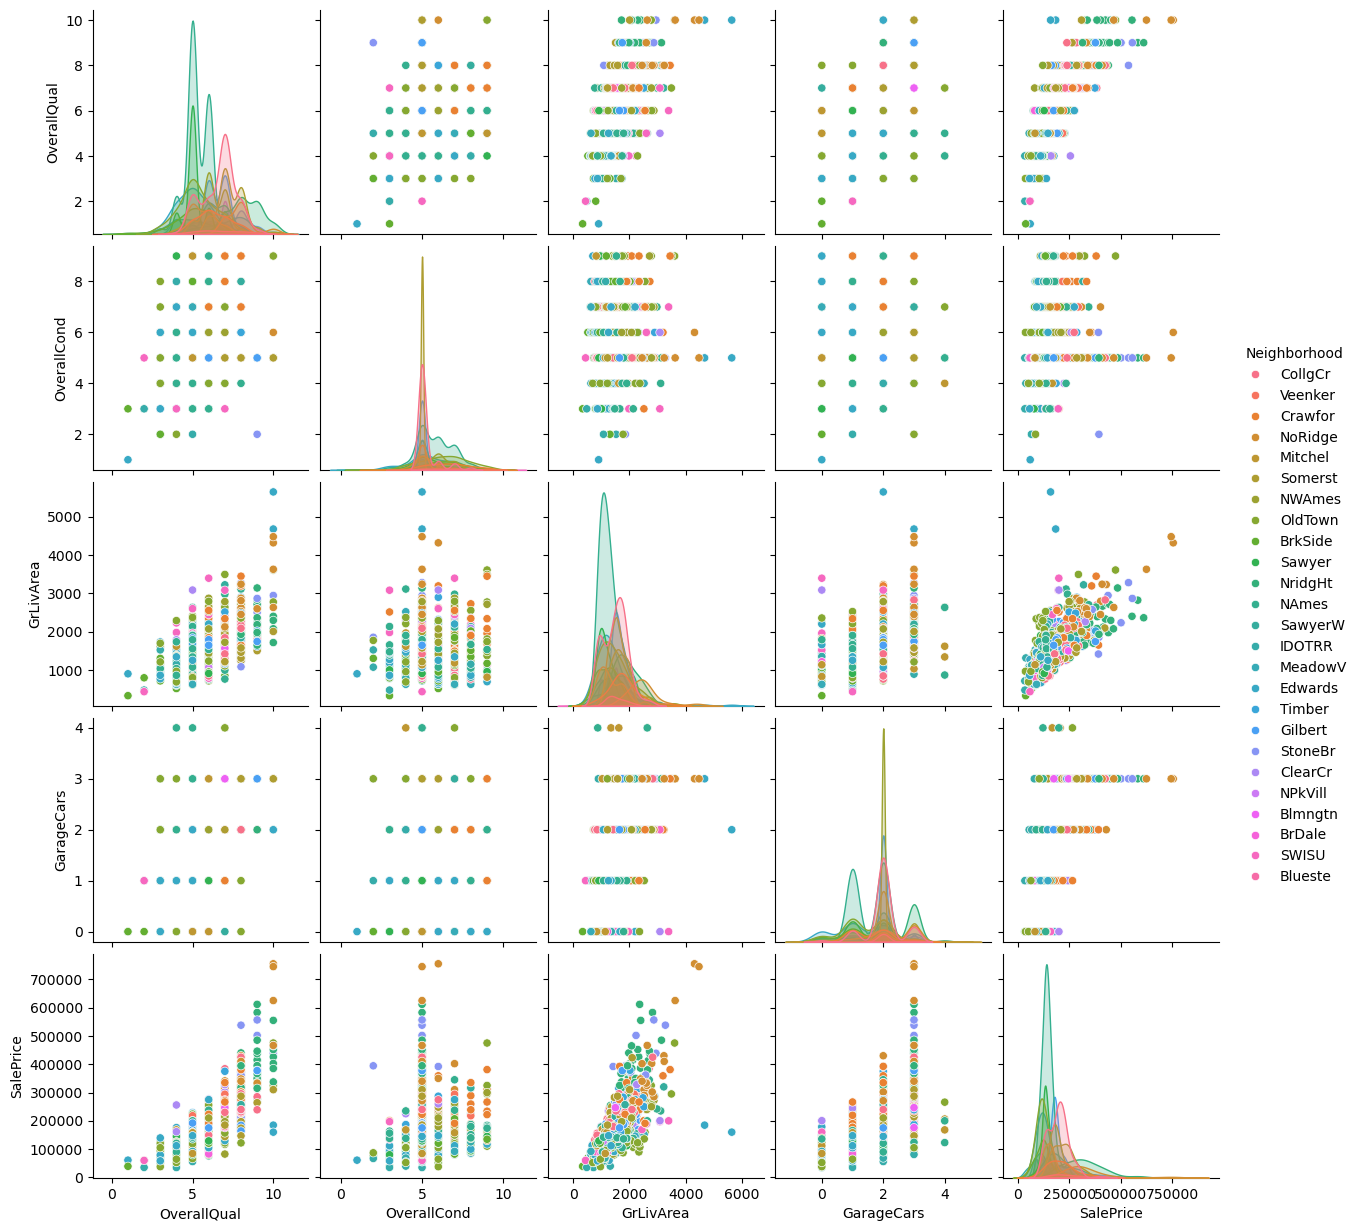

In [23]:
sns.pairplot(df1, hue="Neighborhood")

Есть прямая зависимость между общим качеством дома и общей жилой площадью. Очевидно, что обычно дома с большей площадью имеют более качественную конструкцию и лучше содержатся.

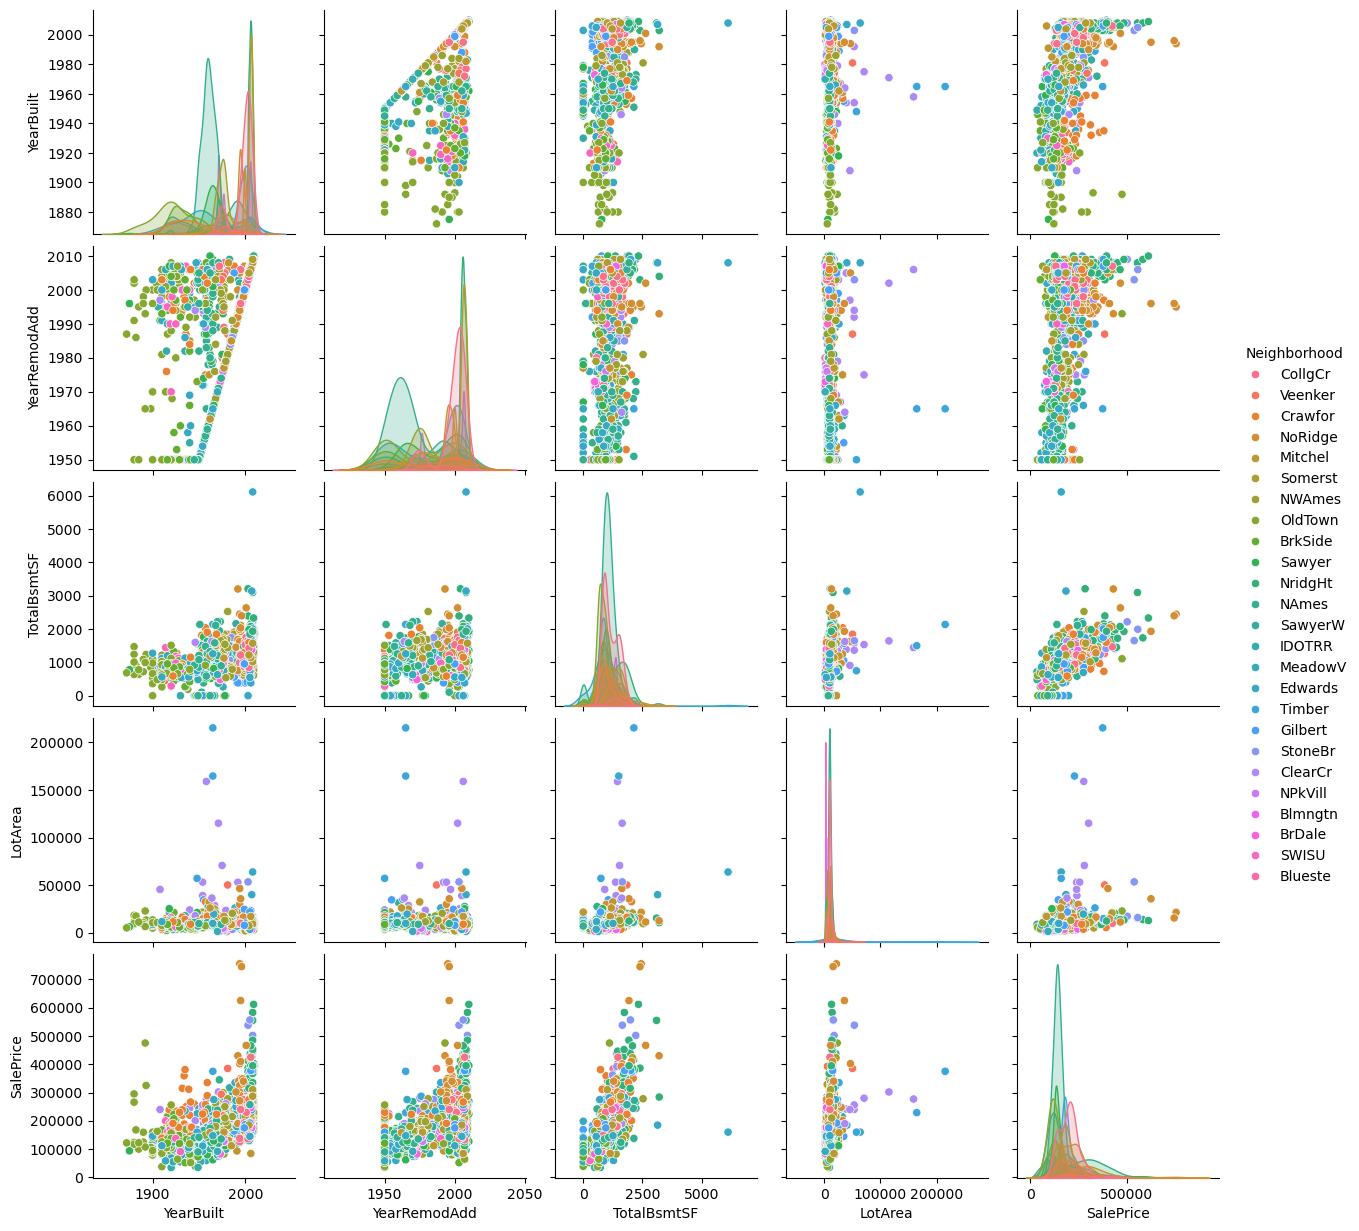

In [24]:
sns.pairplot(df2, hue="Neighborhood")

In [25]:
# Переводим BsmtQual в числовую форму
BsmtQual_enc = {'NA': 0, 'Po': 35, 'Fa': 75, 'TA': 85, 'Gd': 95, 'Ex': 105}
df['BsmtQual_num'] = df['BsmtQual'].replace(BsmtQual_enc)
df['BsmtQual_num']

/tmp/ipykernel_12158/3095800622.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['BsmtQual_num'] = df['BsmtQual'].replace(BsmtQual_enc)


0       95.0
1       95.0
2       95.0
3       85.0
4       95.0
        ... 
1455    95.0
1456    95.0
1457    85.0
1458    85.0
1459    85.0
Name: BsmtQual_num, Length: 1460, dtype: float64

In [26]:
BQmedian = df['BsmtQual_num'].median()
BQmedian

95.0

In [27]:
# Заполняем пробелы в BsmtQual. 
df['BsmtQual_num'] = df['BsmtQual_num'].fillna(BQmedian)
df.to_csv('train_cleaned.csv', index=False)

In [28]:
z_scores = stats.zscore(df['GrLivArea'])
threshold = 3
outliers = df['GrLivArea'][z_scores > threshold]
df.loc[z_scores > threshold, 'GrLivArea'] = df['GrLivArea'].median()

In [29]:
z_scores = stats.zscore(df['SalePrice'])
threshold = 3
outliers = df['SalePrice'][z_scores > threshold]
df.loc[z_scores > threshold, 'SalePrice'] = df['SalePrice'].median()

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

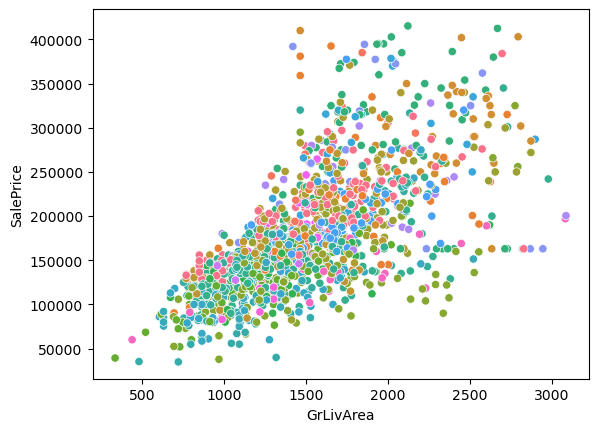

In [30]:
sns.scatterplot(data=df, x="GrLivArea", y="SalePrice", hue='Neighborhood', legend=False)

Без выбросов гораздо лучше видна прямая зависимость цены от общей жилой площади